# Project Title : Supply Chain Management

# Description : 

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

# GOALS

Build a model that will determine an optimum weight of the product to be shipped each time to match the demand and supply from the respective warehouse.

1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it using Test dataset .

## Data Dictionary

1. Ware_house_ID                 : Unique Warehouse id where product is prepared for dispatch, dtype : Object
2. WH_Manager_ID                 : Manager Id present in the warehouse, dtype : Object
3. zone                          : Zone of the Warehouse, dtype : String
4. WH_regional_zone              : Regional Zone of the warehouse, dtype :Object
5. num_refill_req_l3m            : Refilling request received by the warehouse in the last 3 months, dtype : int
6. transport_issue_l1y           : No: of transport issued for warehouse in last 1 year, dtype : int
7. Competitor_in_mkt             : No: of competitors in the market, dtype : int
8. retail_shop_num               : Number of retail shops who sell noodles produced by the warehouse, dtype : int
9. wh_owner_type                 : The warehouse is owned by the company or it is on rent, dtype : String
10. distributor_num              : No: of distributor who works between warehouse and retail shops, dtype : int
11. flood_impacted               : Is the warehouse in a flood impacted area or not, dtype : int
12. Flood_proof                  : Warehouse is having flood proof indicator, dtype : int
13. electric_supply              : Does the warehouse have proper electric supply along with some power backup, dtype : int
14. dist_from_hub                : distance from the warehouse to production hub, dtype : int
15. workers_num                  : no: workers in the warehouse, dtype : int
16. wh_est_year                  : warehouse establishment year, dtype : int
17. storage_issue_reported_l3m   : storage issues reported by the warehouse in the last 3months
18. temp_reg_mach                : warehouse having temperature regulating machine indicator or not, dtype : int
19. approved_wh_govt_certificate : Type of approval warehouse having beenissued by government, dtype : Object
20. wh_breakdown_l3m             : Number of times the warehouse faces the breakdown in the last 3 months, dtype : int
21. product_wg_ton               : Product weight, dtype : int

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd

# Display options in DataFrame

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_columns', None)

# Load Dataset

In [3]:
df1 = pd.read_csv('supply_train.csv')

df1.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


# EDA : Exploratory Data Analysis

In [4]:
# Shape of dataset

df1.shape

(16620, 25)

**Insight :**
- Rows : 16,620 & Columns : 25

In [5]:
# Basic information about data set

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

**Insight :**
- Data set contain of int, object & float datatype

In [6]:
# statistical summary numerical data

df1.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [7]:
# Display all features of dataset

df1.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [8]:
# Rename some features

df1.rename(columns = {'num_refill_req_l3m': 'num_refill_req_last_3m',
                      'transport_issue_l1y' : 'transport_issue_last_y',
                      'storage_issue_reported_l3m' : 'storage_issue_reported_last_3m', 
                      'wh_breakdown_l3m' : 'wh_breakdown_last_3m',
                      'govt_check_l3m' : 'govt_check_last_3m'}, inplace = True)

In [9]:
# Remove unwanted noise column

df1.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# Checking for duplicate data

df1.duplicated().sum()

0

**Insight :**
- No duplicate value

In [11]:
# Checking for any missing Data

df1.isnull().sum()

Ware_house_ID                        0
WH_Manager_ID                        0
Location_type                        0
WH_capacity_size                     0
zone                                 0
WH_regional_zone                     0
num_refill_req_last_3m               0
transport_issue_last_y               0
Competitor_in_mkt                    0
retail_shop_num                      0
wh_owner_type                        0
distributor_num                      0
flood_impacted                       0
flood_proof                          0
electric_supply                      0
dist_from_hub                        0
workers_num                        667
wh_est_year                       7860
storage_issue_reported_last_3m       0
temp_reg_mach                        0
approved_wh_govt_certificate       599
wh_breakdown_last_3m                 0
govt_check_last_3m                   0
product_wg_ton                       0
dtype: int64

**Insight :**
- Null values in workers_num, wh_est_year, approved_wh_govt_certificate

In [12]:
# Remove unnecessary feature that does not match demand and supply

df2 = df1.drop(columns = ['Ware_house_ID', 'WH_Manager_ID', 'wh_est_year', 'approved_wh_govt_certificate'], axis = 1)

In [13]:
# Display the empty data in workers_num features

df2[pd.isnull(df2['workers_num'])]

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_last_3m,transport_issue_last_y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_last_3m,temp_reg_mach,wh_breakdown_last_3m,govt_check_last_3m,product_wg_ton
41,Rural,Small,South,Zone 1,1,0,1,4487,Company Owned,46,0,1,1,216,NaN,25,0,5,21,31087
170,Rural,Small,South,Zone 6,4,3,3,8736,Rented,63,0,1,1,187,NaN,6,1,5,15,7120
217,Rural,Small,West,Zone 1,4,0,3,5550,Rented,69,0,0,1,92,NaN,19,0,4,30,22128
285,Rural,Small,South,Zone 6,4,0,2,4435,Company Owned,24,0,0,0,61,NaN,18,0,4,9,23087
289,Urban,Mid,North,Zone 2,3,0,2,4720,Company Owned,66,1,0,1,149,NaN,38,0,6,12,51140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16600,Rural,Mid,South,Zone 2,4,1,3,7347,Rented,23,0,0,0,217,NaN,5,1,6,32,8115
16604,Rural,Mid,South,Zone 4,3,0,2,5604,Rented,20,0,0,0,67,NaN,17,1,5,26,22057
16605,Rural,Large,South,Zone 5,2,0,3,6772,Company Owned,21,0,0,1,255,NaN,17,0,5,25,22124
16614,Urban,Mid,West,Zone 4,3,0,4,5377,Rented,66,0,0,0,78,NaN,16,0,3,26,21069


In [14]:
# Null value in workers_num is fill with mean

df2['workers_num'].mean()

28.911490001880523

**Insight :**
- Take workers mean value as 29 no:

In [15]:
# Fill null value in workers num with its mean value

df2['workers_num'] = df2['workers_num'].fillna(29)

In [16]:
# Rechecking again for any missing Data

df2.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_last_3m            0
transport_issue_last_y            0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
storage_issue_reported_last_3m    0
temp_reg_mach                     0
wh_breakdown_last_3m              0
govt_check_last_3m                0
product_wg_ton                    0
dtype: int64

**Insight :**
- No missing value

In [17]:
# Exploring each features

for i in df2.columns:
    print(f'Column name : {i} \n\n No: of unique value : {df2[i].nunique()} \n\n {list(df2[i].unique())}\n')
    print('-----------------------------------------------------------------------------------------------------------------')

Column name : Location_type 

 No: of unique value : 2 

 ['Urban', 'Rural']

-----------------------------------------------------------------------------------------------------------------
Column name : WH_capacity_size 

 No: of unique value : 3 

 ['Small', 'Large', 'Mid']

-----------------------------------------------------------------------------------------------------------------
Column name : zone 

 No: of unique value : 4 

 ['West', 'North', 'South', 'East']

-----------------------------------------------------------------------------------------------------------------
Column name : WH_regional_zone 

 No: of unique value : 6 

 ['Zone 6', 'Zone 5', 'Zone 2', 'Zone 3', 'Zone 1', 'Zone 4']

-----------------------------------------------------------------------------------------------------------------
Column name : num_refill_req_last_3m 

 No: of unique value : 9 

 [3, 0, 1, 7, 8, 4, 6, 5, 2]

--------------------------------------------------------------------------

In [18]:
# Convert workers_num to int datatype

df2['workers_num'] = df2['workers_num'].astype(int)

In [19]:
# Assign dataframe to 'data' variable

data = df2.copy()

# Data visualization

In [20]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns

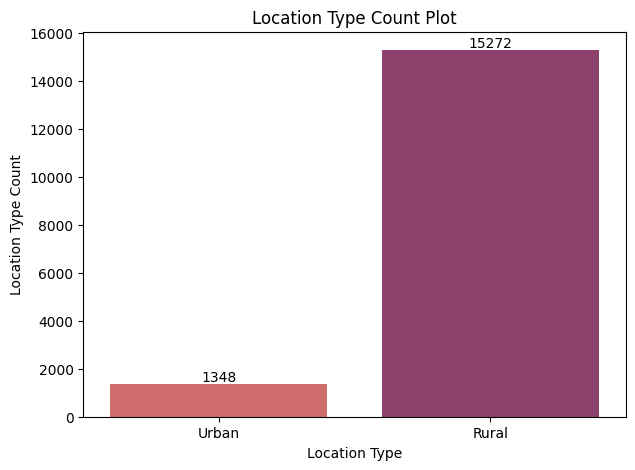

In [21]:
# Count plot of WH capacity size

# Add figure size
plt.figure(figsize=(7, 5))

s1 = sns.countplot(x = 'Location_type', data = data, palette ='flare')
for i in s1.containers:
    plt.bar_label(i, fontsize = 10)

plt.xlabel('Location Type')
plt.ylabel('Location Type Count')

plt.title('Location Type Count Plot')

# Show the plots
plt.show()

**Insight :**
- Majority of warehouse located at Rural area

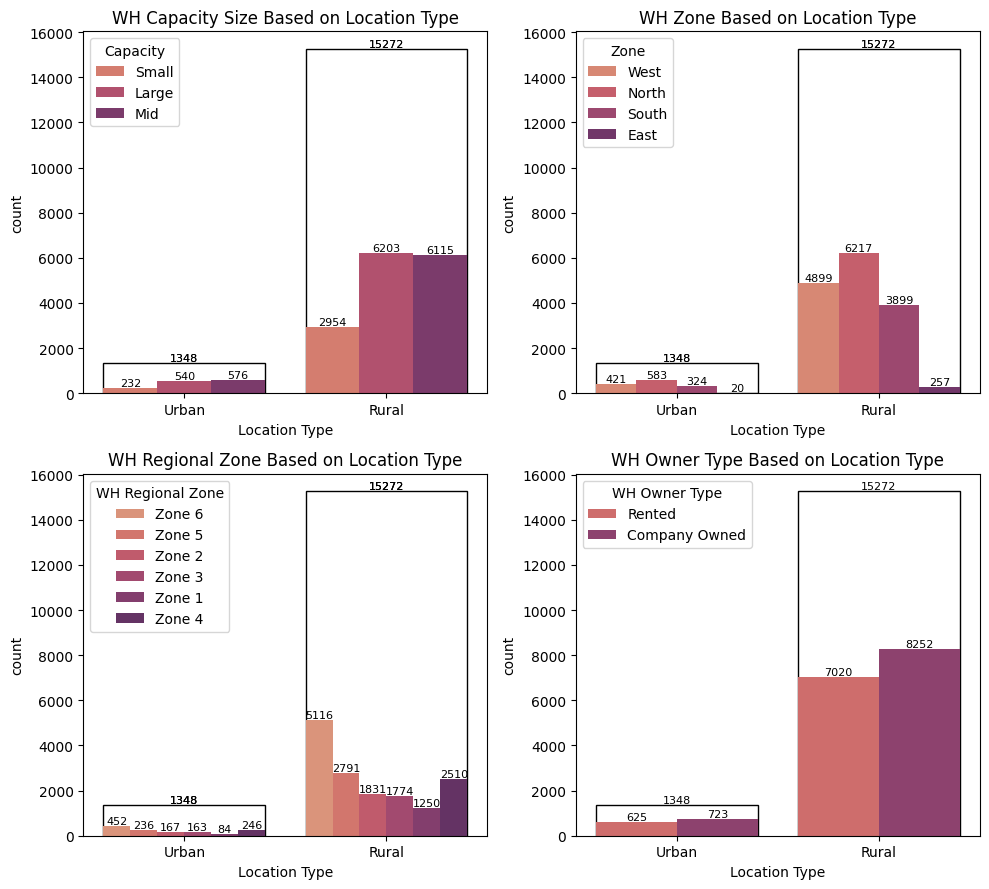

In [22]:
# Count plot of WH capacity size, Zone, WH regional zone, WH owner type based on location type

# Create a sub plot of 2 X 2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 9))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : WH capacity size based on location type

# Count plot of location type for reference
s1 = sns.countplot(x = 'Location_type', ax = axs[0, 0], data = data, color ='white', edgecolor = 'black')
# Add count labels to the bars in the count plot
for i in s1.containers:
    axs[0, 0].bar_label(i, fontsize = 8)
    
# Group count plot based on WH capacity size
s2 = sns.countplot(x ='Location_type',ax = axs[0, 0], hue = 'WH_capacity_size', data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s2.containers:
    axs[0, 0].bar_label(i, fontsize = 8)

# Add plot label
axs[0, 0].set_xlabel('Location Type')

# Add plot title and legend
axs[0, 0].set_title('WH Capacity Size Based on Location Type')
axs[0, 0].legend(title = 'Capacity')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : WH zone based on location type

# Count plot of location type for reference
s1 = sns.countplot(x = 'Location_type', ax = axs[0, 1], data = data, color ='white', edgecolor = 'black')
# Add count labels to the bars in the count plot
for i in s1.containers:
    axs[0, 1].bar_label(i, fontsize = 8)

# Group count plot based on zone
s2 = sns.countplot(x ='Location_type',ax=axs[0, 1], hue = 'zone', data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s2.containers:
    axs[0, 1].bar_label(i, fontsize = 8)

# Add plot label
axs[0, 1].set_xlabel('Location Type')

# Add plot title and legend
axs[0, 1].set_title('WH Zone Based on Location Type')
axs[0, 1].legend(title = 'Zone')

'-----------------------------------------------------------------------------------------------------------------------------'

# 3rd sub plot : WH regional zone based on location type

# Count plot of location type for reference
s1 = sns.countplot(x = 'Location_type', ax = axs[1, 0], data = data, color ='white', edgecolor = 'black')
# Add count labels to the bars in the count plot
for i in s1.containers:
    axs[1, 0].bar_label(i, fontsize = 8)

# Group count plot based on WH regional zone
s2 = sns.countplot(x ='Location_type',ax=axs[1, 0], hue = 'WH_regional_zone', data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s2.containers:
    axs[1, 0].bar_label(i, fontsize = 8)

# Add plot label
axs[1, 0].set_xlabel('Location Type')

# Add plot title and legend
axs[1, 0].set_title('WH Regional Zone Based on Location Type')
axs[1, 0].legend(title = 'WH Regional Zone')

'-----------------------------------------------------------------------------------------------------------------------------'

# 4th sub plot : WH owner type based on location type

# Count plot of location type for reference
s1 = sns.countplot(x = 'Location_type', ax = axs[1, 1], data = data, color ='white', edgecolor = 'black')
# Add count labels to the bars in the count plot
for i in s1.containers:
    axs[1, 0].bar_label(i, fontsize = 8)

# Group count plot based on WH owner type
s2 = sns.countplot(x ='Location_type',ax=axs[1, 1], hue = 'wh_owner_type', data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s2.containers:
    axs[1, 1].bar_label(i, fontsize = 8)

# Add plot label
axs[1, 1].set_xlabel('Location Type')

# Add plot title and legend
axs[1, 1].set_title('WH Owner Type Based on Location Type')
axs[1, 1].legend(title = 'WH Owner Type')

'-----------------------------------------------------------------------------------------------------------------------------'

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- In urban area majority are 
  - WH capacity size : mid capacity
  - WH zone : north
  - WH regional zone : zone 6
  - WH owned type : company owned
- In rural area majority are 
  - WH capacity size : large capacity
  - WH zone : north
  - WH regional zone : zone 6
  - WH owned type : company owned

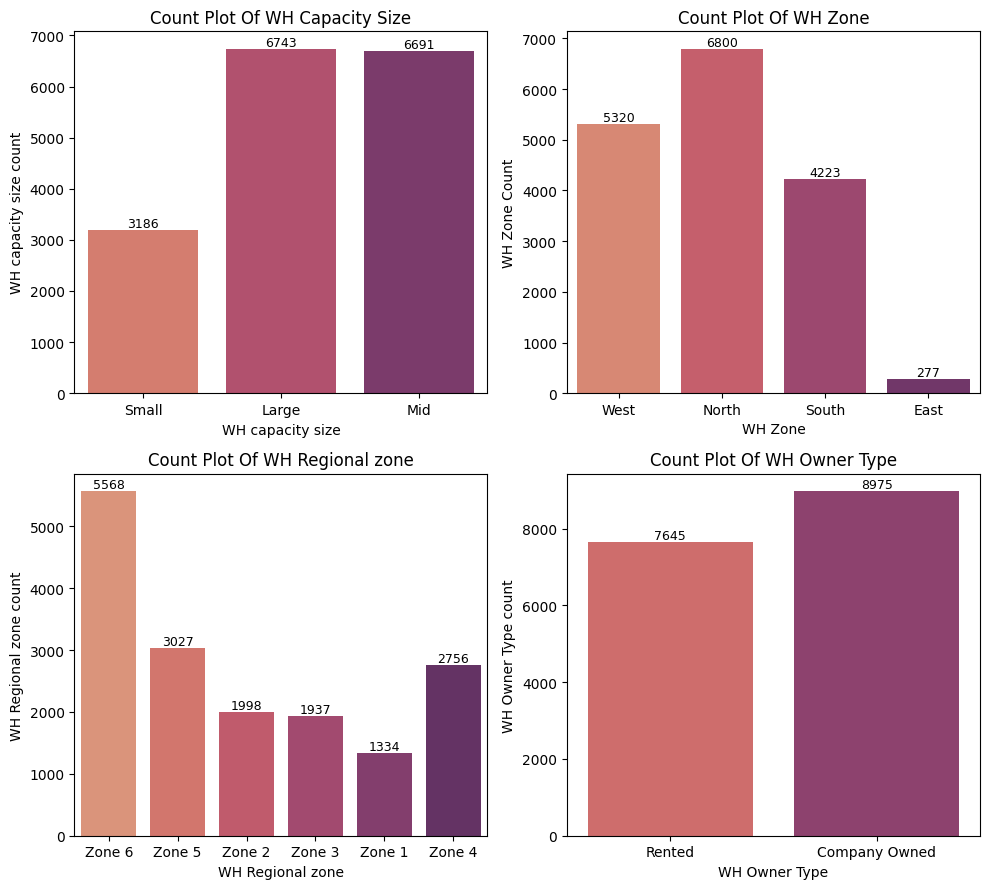

In [23]:
# Count plot of WH capacity size, Zone, WH regional zone, WH owner type

# Create a sub plot of 2 X 2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 9))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : count plot of WH capacity size

s = sns.countplot(x = 'WH_capacity_size', ax = axs[0, 0], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0, 0].bar_label(i, fontsize = 9)

# Add plot label
axs[0, 0].set_xlabel('WH capacity size')
axs[0, 0].set_ylabel('WH capacity size count')

# Add plot title
axs[0, 0].set_title('Count Plot Of WH Capacity Size')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : count plot of WH zone

s = sns.countplot(x = 'zone', ax = axs[0, 1], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0, 1].bar_label(i, fontsize = 9)

# Add plot label
axs[0, 1].set_xlabel('WH Zone')
axs[0, 1].set_ylabel('WH Zone Count')

# Add plot title
axs[0, 1].set_title('Count Plot Of WH Zone')

'-----------------------------------------------------------------------------------------------------------------------------'

# 3rd sub plot : count plot of WH Regional zone

s = sns.countplot(x = 'WH_regional_zone', ax = axs[1, 0], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1, 0].bar_label(i, fontsize = 9)

# Add plot label
axs[1, 0].set_xlabel('WH Regional zone')
axs[1, 0].set_ylabel('WH Regional zone count')

# Add plot title
axs[1, 0].set_title('Count Plot Of WH Regional zone')

'-----------------------------------------------------------------------------------------------------------------------------'

# 4th sub plot : count plot of WH owner Type

s = sns.countplot(x = 'wh_owner_type', ax = axs[1, 1], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1, 1].bar_label(i, fontsize = 9)

# Add plot label
axs[1, 1].set_xlabel('WH Owner Type')
axs[1, 1].set_ylabel('WH Owner Type count')

# Add plot title
axs[1, 1].set_title('Count Plot Of WH Owner Type')

'-----------------------------------------------------------------------------------------------------------------------------'

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Majority of warehouse are 
  - WH capacity size : Large capacity
  - WH zone : north
  - WH regional zone : zone 6
  - WH owned type : company owned

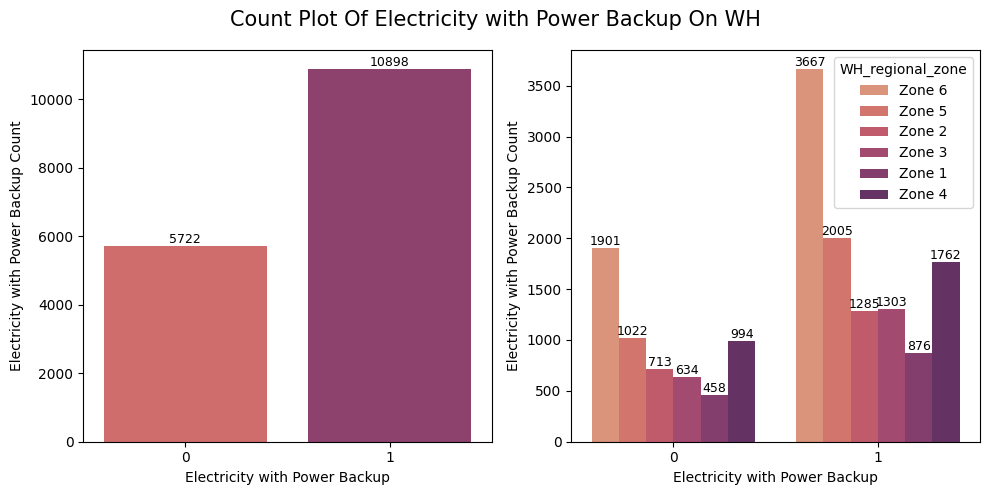

In [24]:
# Count plot of WH which have proper electric supply with power backup

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : count plot of WH which have proper electric supply with power backup

s = sns.countplot(x = 'electric_supply', ax = axs[0], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0].bar_label(i, fontsize = 9)

# Add plot label
axs[0].set_xlabel('Electricity with Power Backup')
axs[0].set_ylabel('Electricity with Power Backup Count')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : count plot of WH which have proper electric supply with power backup based on WH regional zone

s = sns.countplot(x = 'electric_supply', hue = 'WH_regional_zone', ax = axs[1], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1].bar_label(i, fontsize = 9)

# Add plot label
axs[1].set_xlabel('Electricity with Power Backup')
axs[1].set_ylabel('Electricity with Power Backup Count')

'-----------------------------------------------------------------------------------------------------------------------------'

# Add a main title to the subplots
plt.suptitle('Count Plot Of Electricity with Power Backup On WH', fontsize = 15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Majority of warehouse have proper electric supply with power backup in total of 16,620
- zone 6 have majority

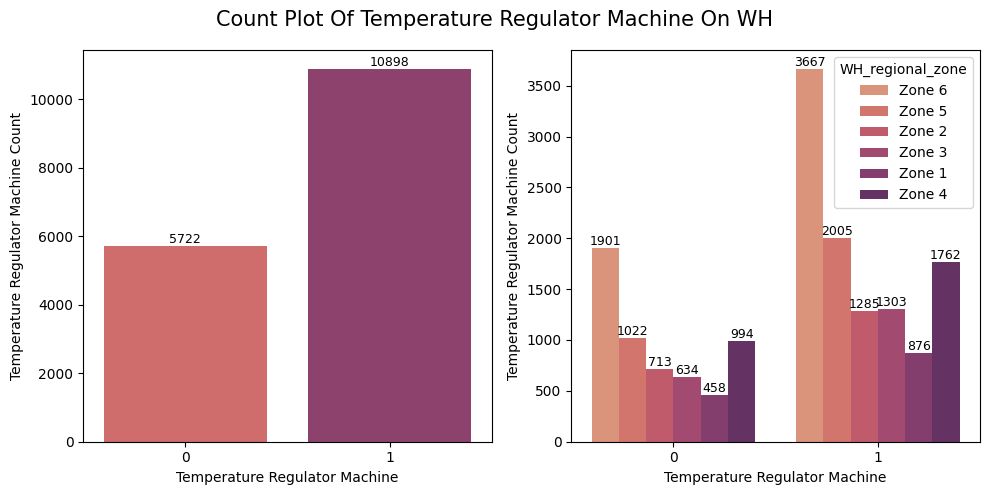

In [25]:
# Count plot of WH which have temperature regulating machine indicator

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : count plot of WH which have temperature regulating machine

s = sns.countplot(x = 'electric_supply', ax = axs[0], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0].bar_label(i, fontsize = 9)

# Add plot label
axs[0].set_xlabel('Temperature Regulator Machine')
axs[0].set_ylabel('Temperature Regulator Machine Count')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : count plot of WH which have temperature regulating machine based on WH regional zone

s = sns.countplot(x = 'electric_supply', hue = 'WH_regional_zone', ax = axs[1], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1].bar_label(i, fontsize = 9)

# Add plot label
axs[1].set_xlabel('Temperature Regulator Machine')
axs[1].set_ylabel('Temperature Regulator Machine Count')

'-----------------------------------------------------------------------------------------------------------------------------'

# Add a main title to the subplots
plt.suptitle('Count Plot Of Temperature Regulator Machine On WH', fontsize = 15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Majority of warehouse have proper temperature regulating machine indicator in total of 16,620.
- zone 6 have majority

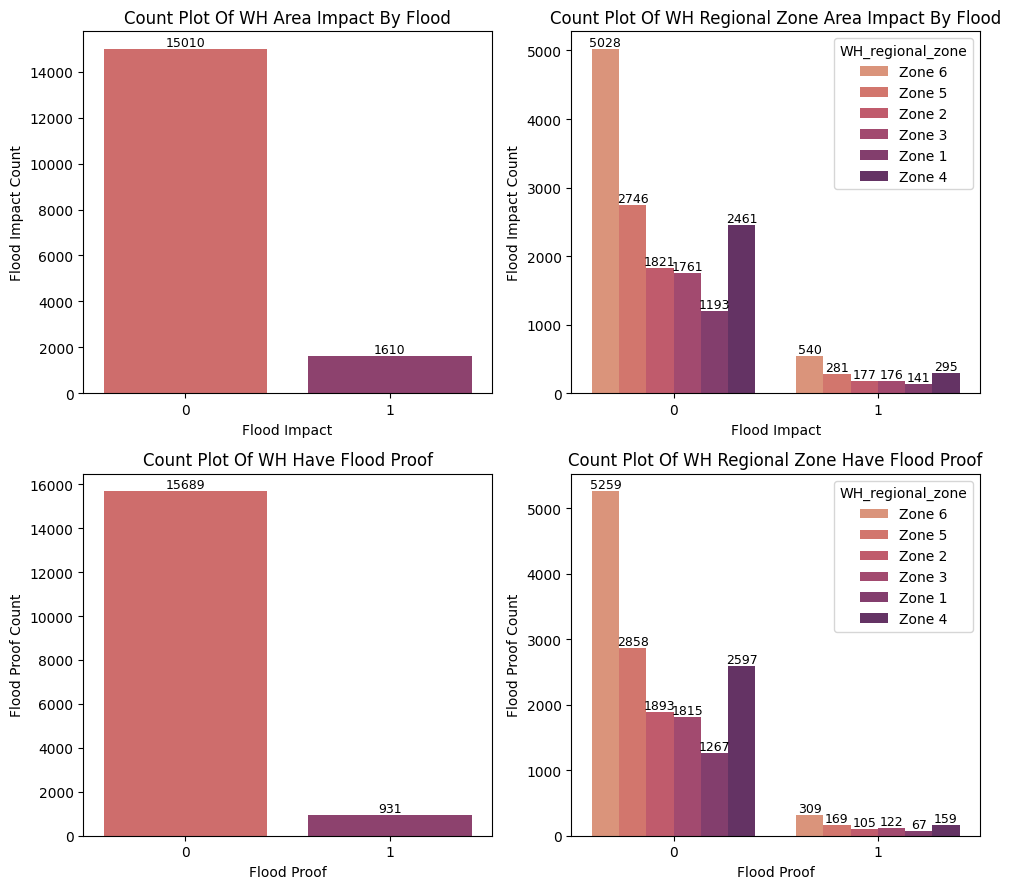

In [26]:
# Count plot of WH capacity size, Zone, WH regional zone, WH owner type

# Create a sub plot of 2 X 2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 9))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : count plot of WH in flood impacted area

s = sns.countplot(x = 'flood_impacted', ax = axs[0, 0], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0, 0].bar_label(i, fontsize = 9)

# Add plot label
axs[0, 0].set_xlabel('Flood Impact')
axs[0, 0].set_ylabel('Flood Impact Count')

# Add plot title
axs[0, 0].set_title('Count Plot Of WH Area Impact By Flood')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : count plot of WH in flood impacted area based on WH region zone

s = sns.countplot(x = 'flood_impacted', hue = 'WH_regional_zone', ax = axs[0, 1], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0, 1].bar_label(i, fontsize = 9)

# Add plot label
axs[0, 1].set_xlabel('Flood Impact')
axs[0, 1].set_ylabel('Flood Impact Count')
 
# Add plot title
axs[0, 1].set_title('Count Plot Of WH Regional Zone Area Impact By Flood')

'-----------------------------------------------------------------------------------------------------------------------------'

# 3rd sub plot : count plot of WH which have flood proof

s = sns.countplot(x = 'flood_proof', ax = axs[1, 0], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1, 0].bar_label(i, fontsize = 9)

# Add plot label
axs[1, 0].set_xlabel('Flood Proof')
axs[1, 0].set_ylabel('Flood Proof Count')

# Add plot title
axs[1, 0].set_title('Count Plot Of WH Have Flood Proof')

'-----------------------------------------------------------------------------------------------------------------------------'

# 4th sub plot : count plot of WH which have flood proof based on WH regional zone

s = sns.countplot(x = 'flood_proof', hue = 'WH_regional_zone', ax = axs[1, 1], data = data, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1, 1].bar_label(i, fontsize = 9)

# Add plot label
axs[1, 1].set_xlabel('Flood Proof')
axs[1, 1].set_ylabel('Flood Proof Count')

# Add plot title
axs[1, 1].set_title('Count Plot Of WH Regional Zone Have Flood Proof')

'-----------------------------------------------------------------------------------------------------------------------------'

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Only less no: of warehouse area are impact by flood in total of 16,620. so flood proof also comparatively less

In [27]:
# Number of warehouse which have flood proof and located at flood impacted area

t1 = data[(data['flood_proof'] == 1) & (data['flood_impacted'] == 1)]
len(t1)

220

**Insight :**
- Only 220 warehouse have flood proof in total of 1610 which located at flood impacted area

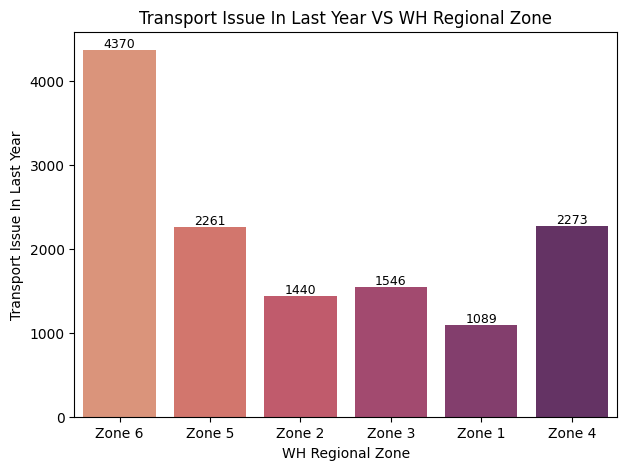

In [28]:
# Bar plot of transport issue in last year

# Add figure size
plt.figure(figsize=(7, 5))

s = sns.barplot(x = 'WH_regional_zone', y = 'transport_issue_last_y', estimator = 'sum', data = data, errorbar = None, palette ='flare')
for i in s.containers:
    plt.bar_label(i, fontsize = 9, fmt='%.f')
    
# Add plot label
plt.xlabel('WH Regional Zone')
plt.ylabel('Transport Issue In Last Year')

# Add plot title
plt.title('Transport Issue In Last Year VS WH Regional Zone')

# Show the plots
plt.show()

In [29]:
data.groupby('WH_regional_zone').transport_issue_last_y.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 4    1.0
Zone 1    1.0
Zone 3    1.0
Zone 6    1.0
Zone 5    1.0
Zone 2    1.0
Name: transport_issue_last_y, dtype: float64

**Insight :**
- Zone 6 have reported mojority of transport issue in last year
- In average of 1 transport issue repoted from each warehouse regional zone

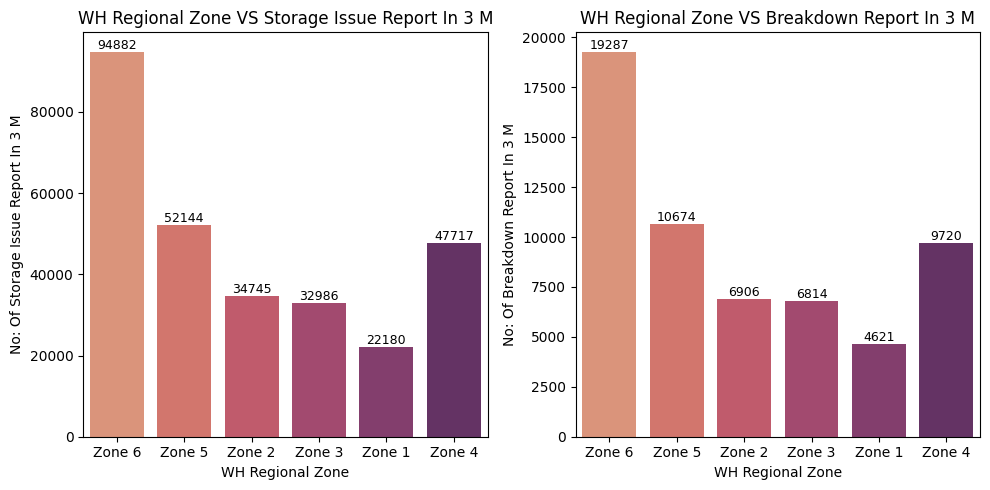

In [30]:
# Bar plot of WH regional zone vs storage issue reported last 3 months, breakdown in last 3 months

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 1st sub plot : Bar plot of WH regional zone vs storage issue reported last 3 months

s = sns.barplot(x = 'WH_regional_zone', y = 'storage_issue_reported_last_3m', estimator = 'sum', ax = axs[0], 
                data = data, errorbar = None, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0].bar_label(i, fontsize = 9, fmt='%.f')

# Add plot label
axs[0].set_xlabel('WH Regional Zone')
axs[0].set_ylabel('No: Of Storage Issue Report In 3 M')

# Add plot title
axs[0].set_title('WH Regional Zone VS Storage Issue Report In 3 M')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : bar plot of WH regional zone vs breakdown in last 3 months

s = sns.barplot(x = 'WH_regional_zone', y = 'wh_breakdown_last_3m', estimator = 'sum', ax = axs[1], 
                data = data, errorbar = None, palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1].bar_label(i, fontsize = 9, fmt='%.f')

# Add plot label
axs[1].set_xlabel('WH Regional Zone')
axs[1].set_ylabel('No: Of Breakdown Report In 3 M')

# Add plot title
axs[1].set_title('WH Regional Zone VS Breakdown Report In 3 M')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
data.groupby('WH_regional_zone').storage_issue_reported_last_3m.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 2    17.0
Zone 4    17.0
Zone 5    17.0
Zone 6    17.0
Zone 3    17.0
Zone 1    17.0
Name: storage_issue_reported_last_3m, dtype: float64

In [32]:
data.groupby('WH_regional_zone').wh_breakdown_last_3m.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 4    4.0
Zone 5    4.0
Zone 3    4.0
Zone 1    3.0
Zone 6    3.0
Zone 2    3.0
Name: wh_breakdown_last_3m, dtype: float64

**Insight :**
- Zone 6 have reported mojority of storage issue and breakdown
- In average of 17 times storage issue repoted from each warehouse regional zone
- In average of 4 times breakdown issue repoted from warehouse regional zone 4, 5 & 3.
- Others only average of 3 times breakdown reported

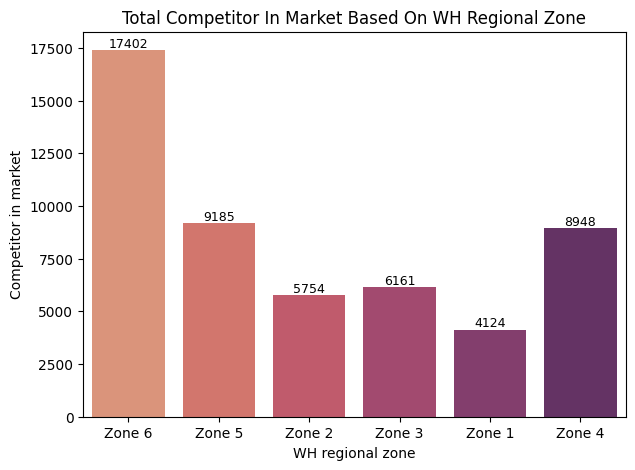

In [33]:
# Bar plot of WH regional zone vs total Competitor in market

# Add figure size
plt.figure(figsize=(7, 5))

s = sns.barplot(x = 'WH_regional_zone', y = 'Competitor_in_mkt', estimator = 'sum', data = data, errorbar = None, 
                palette ='flare')
for i in s.containers:
    plt.bar_label(i, fontsize = 9, fmt='%.f')

# Add plot label
plt.xlabel('WH regional zone')
plt.ylabel('Competitor in market')

# Add plot title
plt.title('Total Competitor In Market Based On WH Regional Zone')

# Show the plots
plt.show()

In [34]:
# Total competitor 

data['Competitor_in_mkt'].sum()

51574

In [35]:
data.groupby('WH_regional_zone').Competitor_in_mkt.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 4    3.0
Zone 3    3.0
Zone 6    3.0
Zone 1    3.0
Zone 5    3.0
Zone 2    3.0
Name: Competitor_in_mkt, dtype: float64

**Insight :**
- In total 16,620 warehouse, company have 51,574 competitor
- In average of 3 competitor in each warehouse regional zone
- Zone 6 have majority of competitors

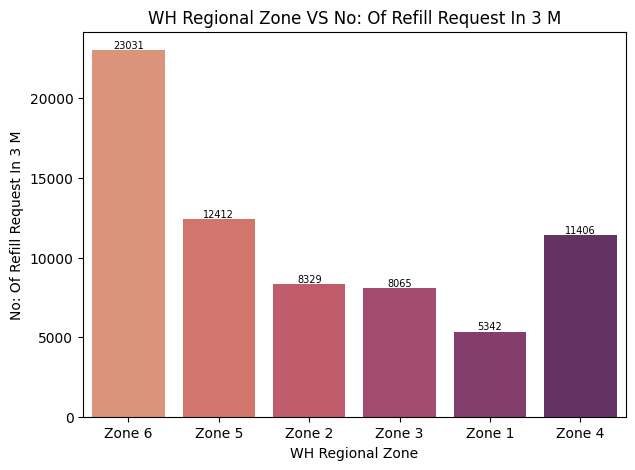

In [36]:
# Bar plot of refill request in last 3 month based WH regional zone

# Add figure size
plt.figure(figsize=(7, 5))

s = sns.barplot(x = 'WH_regional_zone', y = 'num_refill_req_last_3m', estimator = 'sum', data = data, errorbar = None, 
                palette ='flare')
for i in s.containers:
    plt.bar_label(i, fontsize = 7, fmt='%.f')

# Add plot label
plt.xlabel('WH Regional Zone')
plt.ylabel('No: Of Refill Request In 3 M')

# Add plot title
plt.title('WH Regional Zone VS No: Of Refill Request In 3 M')

# Show the plots
plt.show()

In [37]:
data.groupby('WH_regional_zone').num_refill_req_last_3m.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 2    4.0
Zone 3    4.0
Zone 4    4.0
Zone 6    4.0
Zone 5    4.0
Zone 1    4.0
Name: num_refill_req_last_3m, dtype: float64

**Insight :**
- Zone 6 have reported majority of refill request of 23,031 in 3 months
- On average of 4 refill request

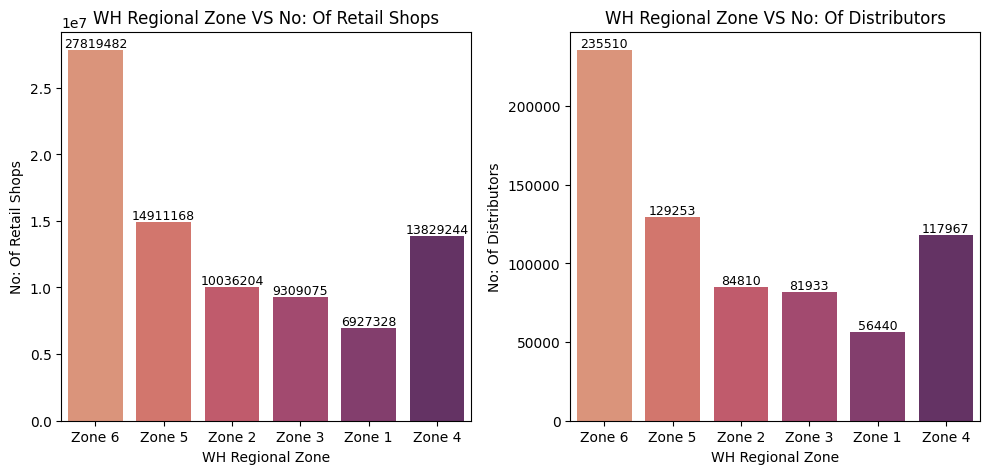

In [38]:
# Bar plot of WH regional zone vs total number of retail shops, number of distributors

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 1st sub plot : Bar plot of total number of retail shop based on WH regional zone

s = sns.barplot(x = 'WH_regional_zone', y = 'retail_shop_num', estimator = 'sum', ax = axs[0], data = data, errorbar = None, 
                palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0].bar_label(i, fontsize = 9, fmt='%.f')

# Add plot label
axs[0].set_xlabel('WH Regional Zone')
axs[0].set_ylabel('No: Of Retail Shops')

# Add plot title
axs[0].set_title('WH Regional Zone VS No: Of Retail Shops')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : bar plot of total number of distributor based on WH regional zone

s = sns.barplot(x = 'WH_regional_zone', y = 'distributor_num', estimator = 'sum', ax = axs[1],data = data, errorbar = None,
                palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1].bar_label(i, fontsize = 9, fmt='%.f')

# Add plot label
axs[1].set_xlabel('WH Regional Zone')
axs[1].set_ylabel('No: Of Distributors')

# Add plot title
axs[1].set_title('WH Regional Zone VS No: Of Distributors')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [39]:
data.groupby('WH_regional_zone').retail_shop_num.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 1    5193.0
Zone 2    5023.0
Zone 4    5018.0
Zone 6    4996.0
Zone 5    4926.0
Zone 3    4806.0
Name: retail_shop_num, dtype: float64

In [40]:
data.groupby('WH_regional_zone').distributor_num.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 4    43.0
Zone 5    43.0
Zone 2    42.0
Zone 1    42.0
Zone 3    42.0
Zone 6    42.0
Name: distributor_num, dtype: float64

**Insight :**
- Zone 6 have majority of retail shop numbers and distributors number
- On average zone 1 have majority of retail shop number with 5,193
- On average zone 4 have majority of distibutor number with 43

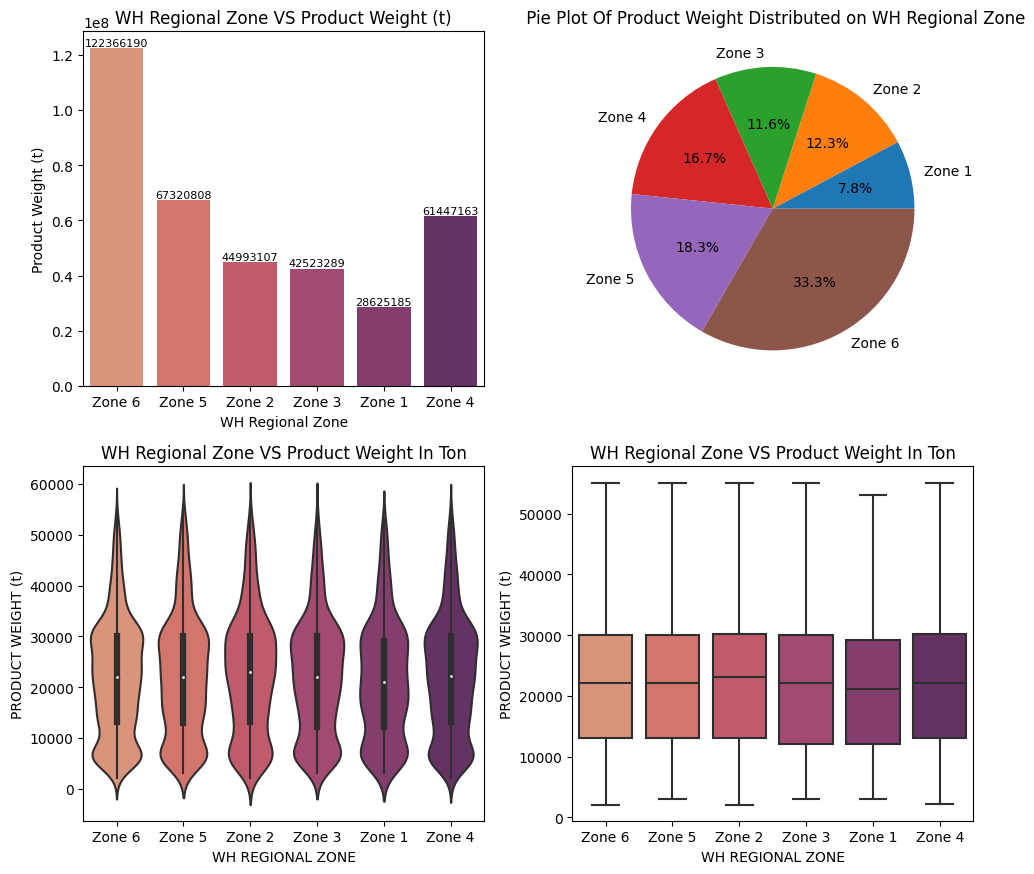

In [41]:
# Bar, Pie, Violin, Box plot of WH regional zone based on product weight

# Create a sub plot of 2 X 2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 9))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : # Bar plot of WH regional zone VS product weight

s = sns.barplot(x = 'WH_regional_zone', y = 'product_wg_ton', estimator = 'sum', errorbar = None,  data = data, ax = axs[0, 0],
                palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[0, 0].bar_label(i, fontsize = 8, fmt='%.f')

# Add plot label
axs[0, 0].set_xlabel('WH Regional Zone')
axs[0, 0].set_ylabel('Product Weight (t)')

# Add plot title
axs[0, 0].set_title('WH Regional Zone VS Product Weight (t)')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : pie plot of product distributed on WH region zone

product_sum = data.groupby('WH_regional_zone').product_wg_ton.sum()
axs[0, 1].pie(x = product_sum, labels = product_sum.index, autopct='%.1f%%')

# Add plot title
axs[0, 1].set_title(' Pie Plot Of Product Weight Distributed on WH Regional Zone')

'-----------------------------------------------------------------------------------------------------------------------------'

# 3rd sub plot : violin plot of product weight produced by WH regionsl zone

sns.violinplot(x = 'WH_regional_zone', y = 'product_wg_ton', data = data, ax = axs[1, 0], palette ='flare')

# Add plot label
axs[1, 0].set_xlabel('WH REGIONAL ZONE')
axs[1, 0].set_ylabel('PRODUCT WEIGHT (t)')

# Add plot title
axs[1, 0].set_title('WH Regional Zone VS Product Weight In Ton')

'-----------------------------------------------------------------------------------------------------------------------------'

# 4th sub plot : box plot of product weight produced by WH regionsl zone

s = sns.boxplot(x = 'WH_regional_zone', y = 'product_wg_ton', data = data, ax = axs[1, 1], palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1, 1].bar_label(i, fontsize = 9)

# Add plot label
axs[1, 1].set_xlabel('WH REGIONAL ZONE')
axs[1, 1].set_ylabel('PRODUCT WEIGHT (t)')

# Add plot title
axs[1, 1].set_title('WH Regional Zone VS Product Weight In Ton')

'-----------------------------------------------------------------------------------------------------------------------------'

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [42]:
# Total product produced by WH regional zone

data.groupby('WH_regional_zone').product_wg_ton.mean().sort_values(ascending = False).round()

WH_regional_zone
Zone 2    22519.0
Zone 4    22296.0
Zone 5    22240.0
Zone 6    21977.0
Zone 3    21953.0
Zone 1    21458.0
Name: product_wg_ton, dtype: float64

In [43]:
# Total product weight in ton 

data['product_wg_ton'].sum()

367275742

In [44]:
# Average product weight in ton

data['product_wg_ton'].mean().round()

22098.0

**Insight :**
- In total 36,72,75,742 ton weight of product supplied
- Majority supplied from warehouse regional zone 6 by 12,23,66,190 ton
- In average of 22,098 ton supplied by each warehouse
- On average Majority supplied from warehouse regional zone 2 by 22,519 ton

# Correlation 

In [45]:
# List out features name which have categorical datatype

obj_features = data.select_dtypes(include = 'object')
obj_columns_list = obj_features.columns
obj_columns_list

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type'],
      dtype='object')

### Label Encoder

In [46]:
# Assign dataframe to 'cr_data' variable

cr_data = data.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in obj_columns_list:
    cr_data[i] = label_encoder.fit_transform(cr_data[i])

cr_data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_last_3m,transport_issue_last_y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_last_3m,temp_reg_mach,wh_breakdown_last_3m,govt_check_last_3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,0,1,1,91,29,13,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,0,0,1,210,31,4,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,0,0,0,161,37,17,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,0,0,0,103,21,17,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,1,0,1,112,25,18,0,6,24,24071


In [47]:
# Relationship

relation_table = cr_data.corr()
relation_table.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_last_3m,transport_issue_last_y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_last_3m,temp_reg_mach,wh_breakdown_last_3m,govt_check_last_3m,product_wg_ton
Location_type,1.000000,-0.005787,-0.009235,0.006358,0.011778,0.009557,0.012287,-0.003619,0.002183,-0.007843,0.012233,0.010053,-0.002275,-0.004220,0.006642,0.077506,0.024067,0.050905,-0.005203,0.073229
WH_capacity_size,-0.005787,1.000000,0.074961,-0.478932,-0.001569,0.016773,0.018835,0.070286,-0.002084,0.002850,0.012755,0.000089,-0.008119,-0.001538,0.001158,-0.013478,0.005437,-0.002311,-0.154765,-0.012596
zone,-0.009235,0.074961,1.000000,-0.057793,0.019845,-0.008331,0.142368,-0.054551,-0.004697,0.006498,-0.004135,0.010641,-0.005341,0.008487,-0.008089,-0.004757,0.021965,0.015560,-0.194558,-0.004789
WH_regional_zone,0.006358,-0.478932,-0.057793,1.000000,0.003844,0.000187,0.026047,-0.023541,-0.000060,-0.000401,-0.000192,0.002694,0.004987,0.002403,0.011975,0.001884,-0.009584,-0.000029,-0.124354,0.000733
num_refill_req_last_3m,0.011778,-0.001569,0.019845,0.003844,1.000000,0.023180,0.019149,-0.005090,0.008047,0.001944,-0.015214,-0.006015,0.001104,-0.000909,-0.013595,-0.008875,0.256853,0.000249,-0.008354,-0.000646


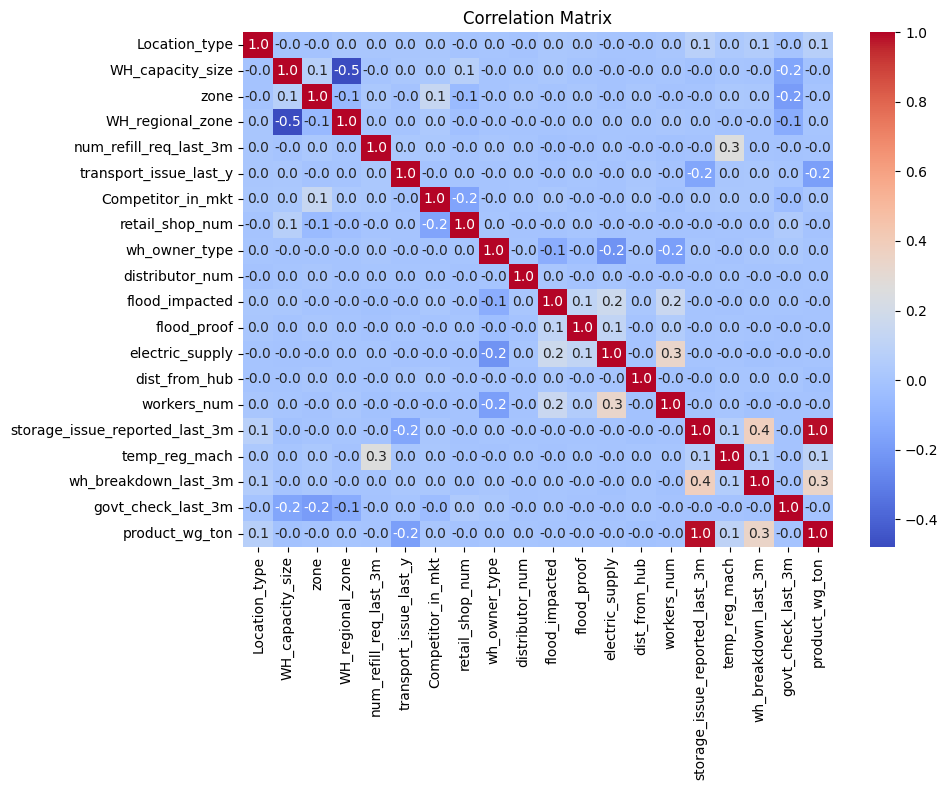

In [48]:
# Visualize relationships using a correlation matrix graph

# Add figure size
plt.figure(figsize=(10,8))

sns.heatmap(relation_table, annot = True, cmap = 'coolwarm', fmt ='.1f')

# Add plot title
plt.title("Correlation Matrix")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Majority of coefficient is zero so the data set is non linear
- There is postive co-relation between storage issue reported, breakdown reported and product weight
- There is negative co-relation between transport issue and product weight

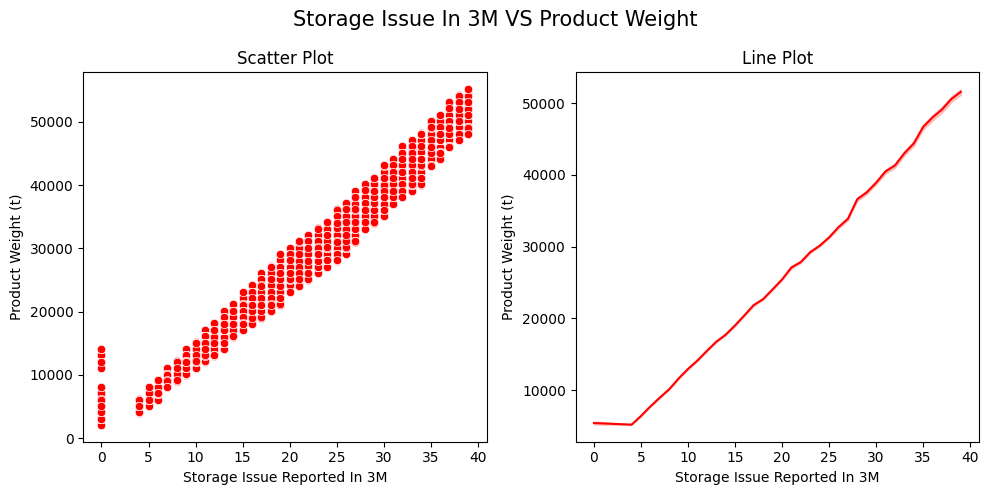

In [49]:
# Scatter & Line Plot Between Storage Issue Reported In 3M vs Product Weight

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : Scatter Plot Between Storage Issue Reported In 3M & Product Weight

sns.scatterplot(x = 'storage_issue_reported_last_3m', y = 'product_wg_ton', data = data, ax = axs[0], color ='r')

# Add plot label
axs[0].set_xlabel('Storage Issue Reported In 3M')
axs[0].set_ylabel('Product Weight (t)')

# Add plot title
axs[0].set_title('Scatter Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : Line Plot Between Storage Issue Reported In 3M & Product Weight

sns.lineplot( x = 'storage_issue_reported_last_3m', y = 'product_wg_ton', data = data, ax = axs[1], color ='r')

# Add plot label
axs[1].set_xlabel('Storage Issue Reported In 3M')
axs[1].set_ylabel('Product Weight (t)')

# Add plot title
axs[1].set_title('Line Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# Add a main title to the subplots
plt.suptitle('Storage Issue In 3M VS Product Weight', fontsize = 15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Product weight increases storage issue also increases

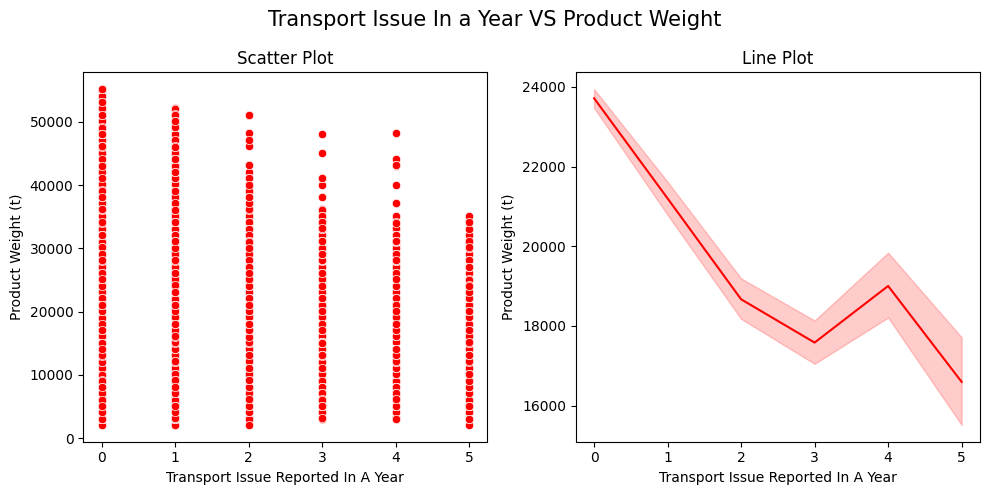

In [50]:
# Scatter & Line Plot Between transport issue reported In a year vs Product Weight

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : Scatter Plot transport issue reported In a year & Product Weight

sns.scatterplot(x = 'transport_issue_last_y', y = 'product_wg_ton', data = data, ax = axs[0], color ='r')

# Add plot label
axs[0].set_xlabel('Transport Issue Reported In A Year')
axs[0].set_ylabel('Product Weight (t)')

# Add plot title
axs[0].set_title('Scatter Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : Line Plot transport issue reported In a year & Product Weight

sns.lineplot( x = 'transport_issue_last_y', y = 'product_wg_ton', data = data, ax = axs[1], color ='r')

# Add plot label
axs[1].set_xlabel('Transport Issue Reported In A Year')
axs[1].set_ylabel('Product Weight (t)')

# Add plot title
axs[1].set_title('Line Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# Add a main title to the subplots
plt.suptitle('Transport Issue In a Year VS Product Weight', fontsize = 15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Product weight decreases transport issue also decreases

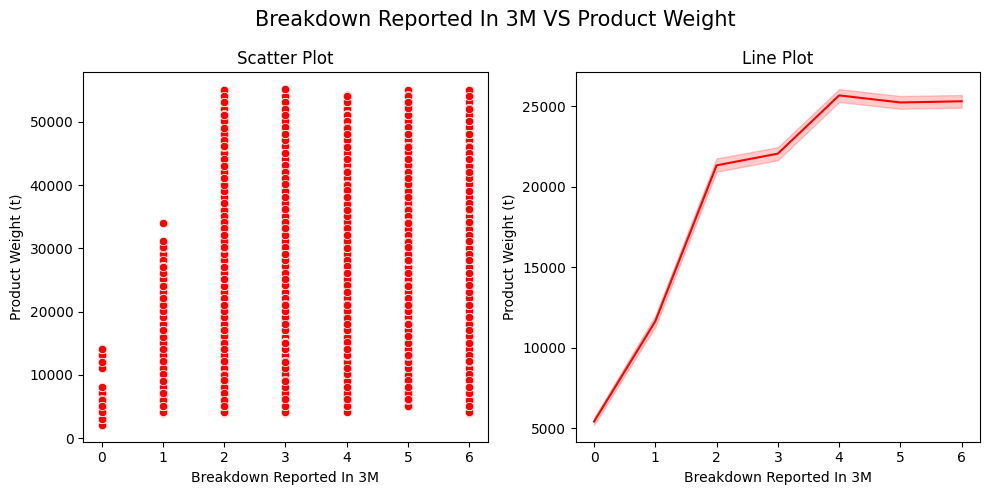

In [51]:
# Scatter & Line Plot Between breakdown Reported In 3M vs Product Weight

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : Scatter Plot Between breakdown Reported In 3M vs Product Weight

sns.scatterplot(x = 'wh_breakdown_last_3m', y = 'product_wg_ton', data = data, ax = axs[0], color ='r')

# Add plot label
axs[0].set_xlabel('Breakdown Reported In 3M')
axs[0].set_ylabel('Product Weight (t)')

# Add plot title
axs[0].set_title('Scatter Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : Line Plot Between breakdown Reported In 3M vs Product Weight

sns.lineplot( x = 'wh_breakdown_last_3m', y = 'product_wg_ton', data = data, ax = axs[1], color ='r')

# Add plot label
axs[1].set_xlabel('Breakdown Reported In 3M')
axs[1].set_ylabel('Product Weight (t)')

# Add plot title
axs[1].set_title('Line Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# Add a main title to the subplots
plt.suptitle('Breakdown Reported In 3M VS Product Weight', fontsize = 15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**Insight :**
- Product weight increases breakdown issue also increases

In [52]:
# statistical summary of product weight

data['product_wg_ton'].describe()

count    16620.000000
mean     22098.420096
std      11620.337346
min       2093.000000
25%      13057.000000
50%      22099.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64

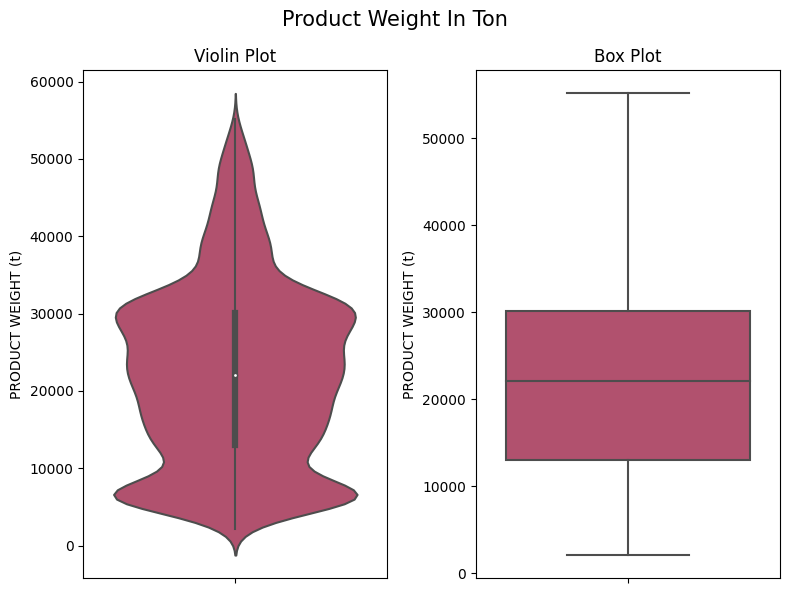

In [53]:
# Bar, Pie, Violin, Box plot of WH product weight

# Create a sub plot of 1 X 2 grid
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

'-----------------------------------------------------------------------------------------------------------------------------'

# 1st sub plot : violin plot of product weight produced by WH

sns.violinplot(y = 'product_wg_ton', data = data, ax = axs[0], palette ='flare')

# Add plot label
axs[0].set_ylabel('PRODUCT WEIGHT (t)')

# Add plot title
axs[0].set_title('Violin Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# 2nd sub plot : box plot of product weight produced by WH

s = sns.boxplot(y = 'product_wg_ton', data = data, ax = axs[1], palette ='flare')
# Add count labels to the bars in the count plot
for i in s.containers:
    axs[1, 1].bar_label(i, fontsize = 9)

# Add plot label
axs[1].set_ylabel('PRODUCT WEIGHT (t)')

# Add plot title
axs[1].set_title('Box Plot')

'-----------------------------------------------------------------------------------------------------------------------------'

# Add a main title to the subplots
plt.suptitle('Product Weight In Ton', fontsize = 15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Outlier Analysis

### Find Outlier with IQR method

In [54]:
# Find percentile of 25% & 75%
Q1 = data['product_wg_ton'].quantile(0.25)
Q3 = data['product_wg_ton'].quantile(0.75)

# Find IQR
IQR = Q3 - Q1

# Find lower & upper whisker
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

# Find outlier
outlier = df1[(data['product_wg_ton']< lower_whisker) | (data['product_wg_ton']>upper_whisker)]

# No: of outlier
len(outlier)

0

**Insight :**
- No outlier using IQR method

### Find Outlier with Standard deviation

In [55]:
# Mean
m = data['product_wg_ton'].mean()

# Standard deviation
sd = data['product_wg_ton'].std()

# -3 Sigma
ns = m - 3*sd

# +3 Sigma
ps = m + 3*sd

# Find outlier
outlier = data[(data['product_wg_ton'] < ns) | (data['product_wg_ton'] > ps)]

# No: of outlier
len(outlier)

0

**Insight :**
- No outlier using standard deviation

# Load Test Data

In [56]:
test = pd.read_csv('supply_test.csv')
test.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,5590,Company Owned,15,0,0,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,5856,Company Owned,40,0,0,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,4803,Rented,40,0,0,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,4784,Rented,15,0,0,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,3699,Rented,24,0,0,0,205,20.0,1999.0,25,0,B,4,26,29071


In [57]:
# Rename some features

df1.rename(columns = {'num_refill_req_l3m': 'num_refill_req_last_3m',
                      'transport_issue_l1y' : 'transport_issue_last_y',
                      'storage_issue_reported_l3m' : 'storage_issue_reported_last_3m', 
                      'wh_breakdown_l3m' : 'wh_breakdown_last_3m',
                      'govt_check_l3m' : 'govt_check_last_3m'}, inplace = True)

In [58]:
# Remove unnecessary feature remove like train data set

test1 = test.drop(columns = ['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'wh_est_year', 'approved_wh_govt_certificate'], 
                 axis = 1)

In [59]:
# Checking if there is any missing Data in workers no: like train data

missing_value = test1['workers_num'].isnull().sum()
missing_value

210

In [60]:
# Null value in workers_num is fill with mean

test1['workers_num'].mean()

29.010528294792255

**Insight :**
- Take workers mean value as 29 no:

In [61]:
# Fill null value in workers num with its mean value

test1['workers_num'] = test1['workers_num'].fillna(29)

In [62]:
# Rechecking again for any missing Data

test1.isnull().sum()

Location_type                 0
WH_capacity_size              0
zone                          0
WH_regional_zone              0
num_refill_req_l3m            0
transport_issue_l1y           0
Competitor_in_mkt             0
retail_shop_num               0
wh_owner_type                 0
distributor_num               0
flood_impacted                0
flood_proof                   0
electric_supply               0
dist_from_hub                 0
workers_num                   0
storage_issue_reported_l3m    0
temp_reg_mach                 0
wh_breakdown_l3m              0
govt_check_l3m                0
product_wg_ton                0
dtype: int64

In [63]:
# Basic information about workers_num

test1['workers_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5529 entries, 0 to 5528
Series name: workers_num
Non-Null Count  Dtype  
--------------  -----  
5529 non-null   float64
dtypes: float64(1)
memory usage: 43.3 KB


In [64]:
# Convert workers_num to int datatype

test1['workers_num'] = test1['workers_num'].astype(int)

# Encode Categorical Data 

In [65]:
# List out features name which have categorical datatype from train data

train_obj_features = data.select_dtypes(include = 'object')
train_obj_columns_list = train_obj_features.columns
train_obj_columns_list

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type'],
      dtype='object')

In [66]:
# Apply One-hot encoding in train data

train = pd.get_dummies(data, columns = train_obj_columns_list)
train.head()

,num_refill_req_last_3m,transport_issue_last_y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_last_3m,temp_reg_mach,wh_breakdown_last_3m,govt_check_last_3m,product_wg_ton,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,zone_North,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented
0,3,1,2,4651,24,0,1,1,91,29,13,0,5,15,17115,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
1,0,0,4,6217,47,0,0,1,210,31,4,0,3,17,5074,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
2,1,0,4,4306,64,0,0,0,161,37,17,0,6,22,23137,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False
3,7,4,2,6000,50,0,0,0,103,21,17,1,3,27,22115,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True
4,3,1,2,4740,42,1,0,1,112,25,18,0,6,24,24071,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False


In [67]:
# List out features name which have categorical datatype from test data

test_obj_features = test1.select_dtypes(include = 'object')
test_obj_columns_list = test_obj_features.columns
test_obj_columns_list

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type'],
      dtype='object')

In [68]:
# Apply One-hot encoding in test data

test = pd.get_dummies(test1, columns = train_obj_columns_list)
test.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,zone_North,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented
0,5,0,3,5590,15,0,0,0,156,30,24,0,2,5,30132,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
1,5,0,2,5856,40,0,0,1,79,31,5,1,2,24,6075,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
2,3,0,3,4803,40,0,0,1,70,41,19,1,5,9,24076,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True
3,5,2,2,4784,15,0,0,1,255,33,9,1,3,11,13092,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True
4,6,0,4,3699,24,0,0,0,205,20,25,0,4,26,29071,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True


# Assign Train & Test Data

In [69]:
# Assign independent variable, x & dependent variable, y in train data

x_train = train.drop(['product_wg_ton'], axis=1) # Drop target key
y_train = train['product_wg_ton']

Display x_train & y_train

In [70]:
x_train.head(3)

,num_refill_req_last_3m,transport_issue_last_y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_last_3m,temp_reg_mach,wh_breakdown_last_3m,govt_check_last_3m,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,zone_North,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented
0,3,1,2,4651,24,0,1,1,91,29,13,0,5,15,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
1,0,0,4,6217,47,0,0,1,210,31,4,0,3,17,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
2,1,0,4,4306,64,0,0,0,161,37,17,0,6,22,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False


In [71]:
y_train.head(3)

0    17115
1     5074
2    23137
Name: product_wg_ton, dtype: int64

In [72]:
# Assign independent variable, x & dependent variable, y in test data

x_test = train.drop(['product_wg_ton'], axis=1) # Drop target key
y_test = train['product_wg_ton']

Display x_test & y_test

In [73]:
x_test.head(3)

,num_refill_req_last_3m,transport_issue_last_y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_last_3m,temp_reg_mach,wh_breakdown_last_3m,govt_check_last_3m,Location_type_Rural,Location_type_Urban,WH_capacity_size_Large,WH_capacity_size_Mid,WH_capacity_size_Small,zone_East,zone_North,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented
0,3,1,2,4651,24,0,1,1,91,29,13,0,5,15,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
1,0,0,4,6217,47,0,0,1,210,31,4,0,3,17,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False
2,1,0,4,4306,64,0,0,0,161,37,17,0,6,22,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False


In [74]:
y_test.head(3)

0    17115
1     5074
2    23137
Name: product_wg_ton, dtype: int64

# Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(x_train)

# Transform both the training and testing datasets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Machine Learning Models

## 1. Linear Regression

### Model

In [76]:
# Import libraries for model

from sklearn.linear_model import LinearRegression

In [77]:
# Object created from library

LR_model = LinearRegression()

In [78]:
# Training the model using fit function

LR_model.fit(x_train_scaled, y_train)

LinearRegression()

In [79]:
# Make model predictions on test data using predict function

LR_pred = LR_model.predict(x_test_scaled).round(2)
LR_pred

array([16145.5,  5663.5, 21457.5, ..., 31351.5, 19815.5, 40613.5])

In [80]:
# Accuracy of model using score function

LR_model.score(x_test_scaled,y_test).round(2)

0.98

In [81]:
# Cross validating accuracy of model using cross_val_score

from sklearn.model_selection import cross_val_score

LR_scores = cross_val_score(LR_model, x_test_scaled, y_test, cv = 10).round(3) # cv = 10 times repeat the model and check each accuracy
print('Accuracy values : ', LR_scores)

avg_LR_score = LR_scores.mean().round(2)
print('Average accuracy : ', avg_LR_score)

Accuracy values :  [0.977 0.978 0.977 0.976 0.978 0.978 0.978 0.973 0.976 0.978]
Average accuracy :  0.98


**Insight :** 

98 % Accuracy in Linear Regression Model

### Evaluation

In [82]:
# Import libraries for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
LR_mse = mean_squared_error(y_test, LR_pred).round(2)
print('Mean Squared Error (MSE) : ', LR_mse)

LR_rmse = np.sqrt(LR_mse).round(2)
print('Root Mean Squared Error (RMSE) : ', LR_rmse)

LR_mae = mean_absolute_error(y_test, LR_pred).round(2)
print('Mean Absolute Error (MAE) : ', LR_mae)

LR_r2 = r2_score(y_test, LR_pred).round(2)
print('R-squared (coefficient of determination) : ', LR_r2)

Mean Squared Error (MSE) :  3104451.06
Root Mean Squared Error (RMSE) :  1761.95
Mean Absolute Error (MAE) :  1298.31
R-squared (coefficient of determination) :  0.98


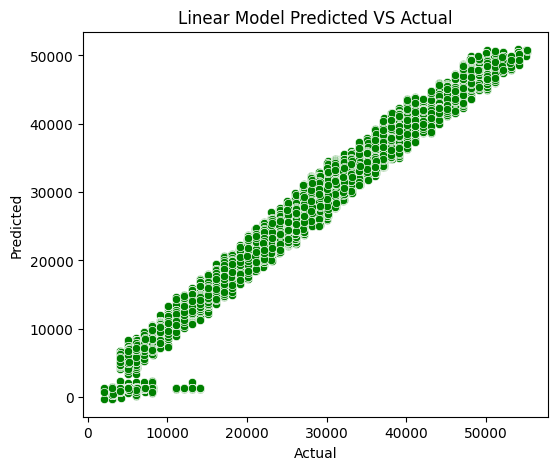

In [84]:
# Linear Model Predicted VS Actual

# Add figure size
plt.figure(figsize=(6, 5))

sns.scatterplot(x = y_train, y = LR_pred, data = data, color ='g')

# Add plot label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add plot title
plt.title('Linear Model Predicted VS Actual')

# Show the plots
plt.show()

## 2. Decision Tree

### Model

In [85]:
# Import libraries for model

from sklearn.tree import DecisionTreeRegressor

In [86]:
# Object created from library

DT_model = DecisionTreeRegressor()

Best model is criterion = 'absolute_error', max_depth = 4, max_features = 'log2'

In [135]:
# Object created for best hyperparameter

DT_model = DecisionTreeRegressor(criterion = 'absolute_error', max_depth = 4, max_features = 'log2')

In [147]:
# Training the model using fit function

DT_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='log2')

In [148]:
# Make model predictions on test data using predict function

DT_pred = DT_model.predict(x_test_scaled).round(2)
DT_pred

array([21115. , 11072.5, 29094. , ..., 29094. , 21133.5, 29094. ])

In [149]:
# Accuracy of model using score function

DT_model.score(x_test_scaled,y_test).round(2)

0.44

In [146]:
# Cross validating accuracy of model using cross_val_score

from sklearn.model_selection import cross_val_score

DT_scores = cross_val_score(DT_model, x_test_scaled, y_test, cv = 10).round(3)
print('Accuracy values : ', DT_scores)

avg_DT_score = DT_scores.mean().round(2)
print('Average accuracy : ', avg_DT_score)

Accuracy values :  [0.423 0.058 0.251 0.601 0.024 0.624 0.649 0.727 0.671 0.052]
Average accuracy :  0.41


**Insight :** 

41 % Accuracy in Decision Tree Model

### Evaluation

In [92]:
# Import libraries for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [150]:
DT_mse = mean_squared_error(y_test, DT_pred).round(2)
print('Mean Squared Error (MSE) : ', DT_mse)

DT_rmse = np.sqrt(DT_mse).round(2)
print('Root Mean Squared Error (RMSE) : ', DT_rmse)

DT_mae = mean_absolute_error(y_test, DT_pred).round(2)
print('Mean Absolute Error (MAE) : ', DT_mae)

DT_r2 = r2_score(y_test, DT_pred).round(2)
print('R-squared (coefficient of determination) : ', DT_r2)

Mean Squared Error (MSE) :  76227792.93
Root Mean Squared Error (RMSE) :  8730.85
Mean Absolute Error (MAE) :  6721.3
R-squared (coefficient of determination) :  0.44


### Plot the Decision Tree

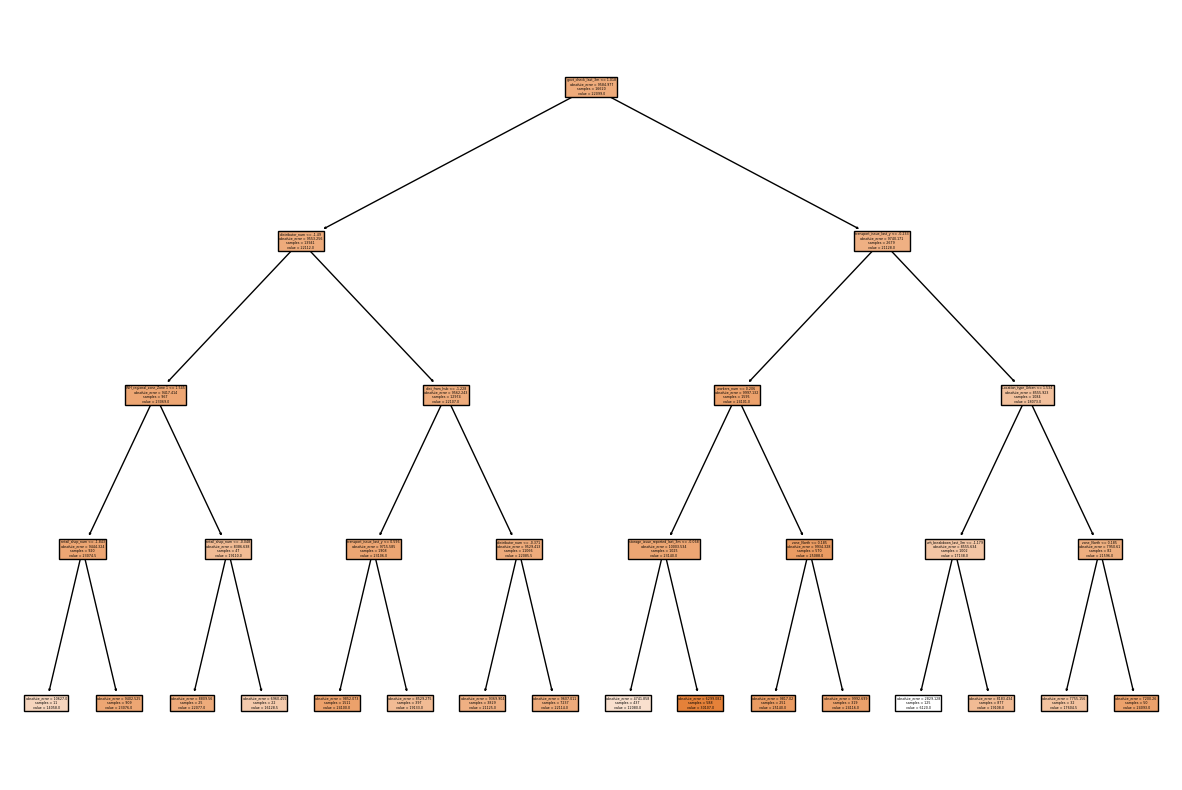

In [94]:
from sklearn import tree
from sklearn.tree import plot_tree

# Add figure size
plt.figure(figsize=(15, 10))

plot_tree(DT_model, feature_names = x_train.columns, filled = True)

# Show the plots
plt.show()

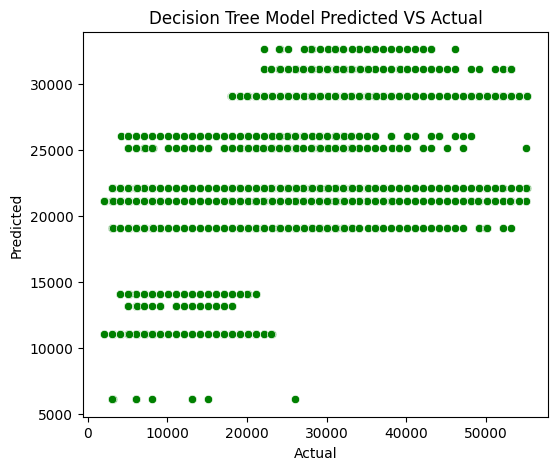

In [151]:
# Decision Tree Model Predicted VS Actual

# Add figure size
plt.figure(figsize=(6, 5))

sns.scatterplot(x = y_train, y = DT_pred, data = data, color ='g')

# Add plot label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add plot title
plt.title('Decision Tree Model Predicted VS Actual')

# Show the plots
plt.show()

## 3. Random Forest (Ensemble Techniques)

In [96]:
# Import libraries for model

from sklearn.ensemble import RandomForestRegressor

In [97]:
# Object created from library

RF_model = RandomForestRegressor()

Best model is criterion = 'friedman_mse', max_depth = 4, max_features = 'sqrt'

In [98]:
# Object created for best hyperparameter

RF_model = RandomForestRegressor(n_estimators = 100, criterion = 'friedman_mse', max_depth = 4, max_features = 'sqrt')
# n_estimators means n no: of decision tree consist in random forest

In [99]:
# Training the model using fit function

RF_model.fit(x_train_scaled, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='sqrt')

In [100]:
# Make model predictions on test data using predict function

RF_pred = RF_model.predict(x_test_scaled).round(2)
RF_pred

array([19419.49, 17586.66, 24388.05, ..., 27520.54, 17810.52, 28357.41])

In [101]:
# Accuracy of model using score function

RF_model.score(x_test_scaled,y_test).round(2)

0.62

In [102]:
# Cross validating accuracy of model using cross_val_score

from sklearn.model_selection import cross_val_score

RF_scores = cross_val_score(RF_model, x_test_scaled, y_test, cv = 10).round(3)
print('Accuracy values : ', RF_scores)

avg_RF_score = RF_scores.mean().round(2)
print('Average accuracy : ', avg_RF_score)

Accuracy values :  [0.668 0.593 0.566 0.626 0.686 0.647 0.646 0.532 0.63  0.653]
Average accuracy :  0.62


**Insight :** 

 62 % Accuracy in Random forest Model

### Evaluation

In [103]:
# Import libraries for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [104]:
RF_mse = mean_squared_error(y_test, RF_pred).round(2)
print('Mean Squared Error (MSE) : ', RF_mse)

RF_rmse = np.sqrt(RF_mse).round(2)
print('Root Mean Squared Error (RMSE) : ', RF_rmse)

RF_mae = mean_absolute_error(y_test, RF_pred).round(2)
print('Mean Absolute Error (MAE) : ', RF_mae)

RF_r2 = r2_score(y_test, RF_pred).round(2)
print('R-squared (coefficient of determination) : ', RF_r2)

Mean Squared Error (MSE) :  51787921.93
Root Mean Squared Error (RMSE) :  7196.38
Mean Absolute Error (MAE) :  5474.27
R-squared (coefficient of determination) :  0.62


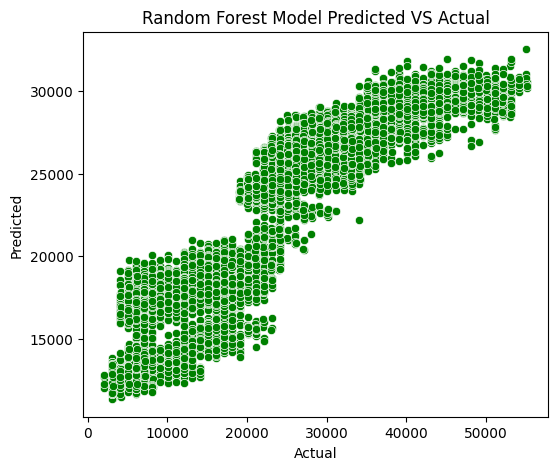

In [105]:
# Random Forest Model Predicted VS Actual

# Add figure size
plt.figure(figsize=(6, 5))

sns.scatterplot(x = y_train, y = RF_pred, data = data, color ='g')

# Add plot label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add plot title
plt.title('Random Forest Model Predicted VS Actual')

# Show the plots
plt.show()

## 4. SVM (support vector machine)

In [106]:
# Import libraries for model

from sklearn.svm import SVR

In [107]:
# Object created from library

SVM_model = SVR()

Best model is kernel = 'linear'

In [108]:
# Object created for best hyperparameter

SVM_model = SVR(kernel = 'linear')

In [109]:
# Training the model using fit function

SVM_model.fit(x_train_scaled, y_train)

SVR(kernel='linear')

In [110]:
# Make model predictions on test data using predict function

SVM_pred = SVM_model.predict(x_test_scaled).round(2)
SVM_pred

array([17840.99,  8222.54, 22286.39, ..., 29965.16, 20015.64, 37007.28])

In [111]:
# Accuracy of model using score function

SVM_model.score(x_test_scaled,y_test).round(2)

0.95

In [112]:
# Cross validating accuracy of model using cross_val_score

from sklearn.model_selection import cross_val_score

SVM_scores = cross_val_score(SVM_model, x_test_scaled, y_test, cv = 10).round(3)
print('Accuracy values : ', SVM_scores)

avg_SVM_score = SVM_scores.mean().round(2)
print('Average accuracy : ', avg_SVM_score)

Accuracy values :  [0.935 0.936 0.937 0.932 0.938 0.936 0.937 0.936 0.935 0.936]
Average accuracy :  0.94


**Insight :** 

 94 % Accuracy in SVM Model

### Evaluation

In [113]:
# Import libraries for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [114]:
SVM_mse = mean_squared_error(y_test, SVM_pred).round(2)
print('Mean Squared Error (MSE) : ', SVM_mse)

SVM_rmse = np.sqrt(SVM_mse).round(2)
print('Root Mean Squared Error (RMSE) : ', SVM_rmse)

SVM_mae = mean_absolute_error(y_test, SVM_pred).round(2)
print('Mean Absolute Error (MAE) : ', SVM_mae)

SVM_r2 = r2_score(y_test, SVM_pred).round(2)
print('R-squared (coefficient of determination) : ', SVM_r2)

Mean Squared Error (MSE) :  7156004.82
Root Mean Squared Error (RMSE) :  2675.07
Mean Absolute Error (MAE) :  2053.87
R-squared (coefficient of determination) :  0.95


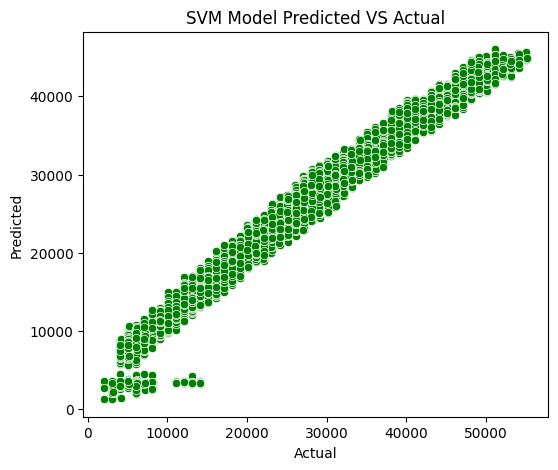

In [115]:
# SVM Model Predicted VS Actual

# Add figure size
plt.figure(figsize=(6, 5))

sns.scatterplot(x = y_train, y = SVM_pred, data = data, color ='g')

# Add plot label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add plot title
plt.title('SVM Model Predicted VS Actual')

# Show the plots
plt.show()

## 5. K-NN (K Nearest Neighbour)

In [116]:
# Import libraries for model

from sklearn.neighbors import KNeighborsRegressor

In [117]:
# Object created from library

KNN_model = KNeighborsRegressor()

Best model is n_neighbors = 6

In [118]:
# Object created for best hyperparameter

KNN_model = KNeighborsRegressor(n_neighbors = 6)

In [119]:
# Training the model using fit function

KNN_model.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=6)

In [120]:
# Make model predictions on test data using predict function

KNN_pred = KNN_model.predict(x_test_scaled).round(2)
KNN_pred

array([18097.  , 12087.33, 19783.83, ..., 26954.33, 13446.17, 31443.17])

In [121]:
# Accuracy of model using score function

KNN_model.score(x_test_scaled, y_test).round(2)

0.77

In [122]:
# Cross validating accuracy of model using cross_val_score

from sklearn.model_selection import cross_val_score

KNN_scores = cross_val_score(KNN_model, x_test_scaled, y_test, cv = 10, scoring = 'explained_variance').round(3)
print('Accuracy values : ', KNN_scores)

avg_KNN_score = KNN_scores.mean().round(2)
print('Average accuracy : ', avg_KNN_score)

Accuracy values :  [0.669 0.687 0.683 0.658 0.681 0.656 0.679 0.667 0.675 0.677]
Average accuracy :  0.67


**Insight :** 

 67 % Accuracy in KNN Model

### Evaluation

In [123]:
# Import libraries for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [124]:
KNN_mse = mean_squared_error(y_test, KNN_pred).round(2)
print('Mean Squared Error (MSE) : ', KNN_mse)

KNN_rmse = np.sqrt(KNN_mse).round(2)
print('Root Mean Squared Error (RMSE) : ', KNN_rmse)

KNN_mae = mean_absolute_error(y_test, KNN_pred).round(2)
print('Mean Absolute Error (MAE) : ', KNN_mae)

KNN_r2 = r2_score(y_test, KNN_pred).round(2)
print('R-squared (coefficient of determination) : ', KNN_r2)

Mean Squared Error (MSE) :  30451228.16
Root Mean Squared Error (RMSE) :  5518.26
Mean Absolute Error (MAE) :  4362.95
R-squared (coefficient of determination) :  0.77


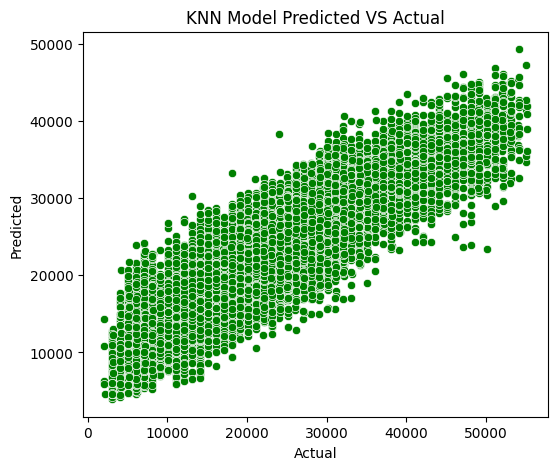

In [125]:
# KNN Model Predicted VS Actual

# Add figure size
plt.figure(figsize=(6, 5))

sns.scatterplot(x = y_train, y = KNN_pred, data = data, color ='g')

# Add plot label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add plot title
plt.title('KNN Model Predicted VS Actual')

# Show the plots
plt.show()

## 6. ADABoost (Ensemble Techniques)

In [126]:
# Import libraries for model

from sklearn.ensemble import AdaBoostRegressor

In [127]:
# Initialize the AdaBoost regressor with a base learner (here KNN model)

base_regressor = KNN_model = KNeighborsRegressor(n_neighbors = 6)

ADA_model = AdaBoostRegressor(base_regressor, n_estimators = 60)

In [128]:
# Training the model using fit function

ADA_model.fit(x_train_scaled, y_train)

AdaBoostRegressor(estimator=KNeighborsRegressor(n_neighbors=6), n_estimators=60)

In [129]:
# Make model predictions on test data using predict function

ADA_pred = ADA_model.predict(x_test_scaled).round(2)
ADA_pred

array([12426.17, 10923.83, 16109.67, ..., 24437.  , 14785.67, 36762.33])

In [130]:
# Accuracy of model using score function

ADA_model.score(x_test_scaled, y_test).round(2)

0.86

In [131]:
# Cross validating accuracy of model using cross_val_score

from sklearn.model_selection import cross_val_score

ADA_scores = cross_val_score(ADA_model, x_test_scaled, y_test, cv = 10, scoring = 'explained_variance').round(3)
print('Accuracy values : ', ADA_scores)

avg_ADA_score = ADA_scores.mean().round(2)
print('Average accuracy : ', avg_ADA_score)

Accuracy values :  [0.714 0.734 0.729 0.716 0.744 0.698 0.738 0.721 0.728 0.723]
Average accuracy :  0.72


**Insight :** 

72 % Accuracy in AdaBoost Model using  KNN base  model

### Evaluation

In [132]:
# Import libraries for evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [133]:
ADA_mse = mean_squared_error(y_test, ADA_pred).round(2)
print('Mean Squared Error (MSE) : ', ADA_mse)

ADA_rmse = np.sqrt(ADA_mse).round(2)
print('Root Mean Squared Error (RMSE) : ', ADA_rmse)

ADA_mae = mean_absolute_error(y_test, ADA_pred).round(2)
print('Mean Absolute Error (MAE) : ', ADA_mae)

ADA_r2 = r2_score(y_test, ADA_pred).round(2)
print('R-squared (coefficient of determination) : ', ADA_r2)

Mean Squared Error (MSE) :  18967728.55
Root Mean Squared Error (RMSE) :  4355.2
Mean Absolute Error (MAE) :  3787.01
R-squared (coefficient of determination) :  0.86


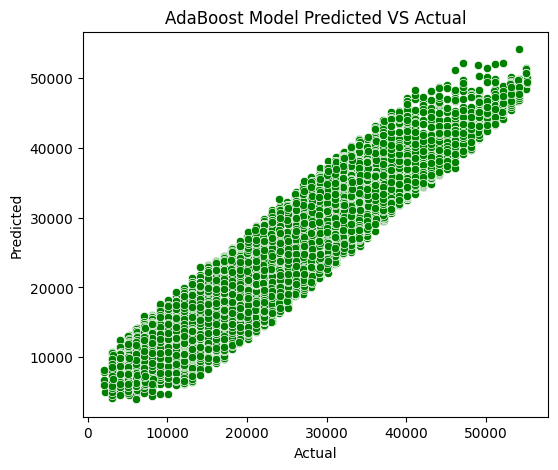

In [134]:
# AdaBoost Model Predicted VS Actual

# Add figure size
plt.figure(figsize=(6, 5))

sns.scatterplot(x = y_train, y = ADA_pred, data = data, color ='g')

# Add plot label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add plot title
plt.title('AdaBoost Model Predicted VS Actual')

# Show the plots
plt.show()